In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
df = pd.read_csv("data/bbr_historisk_all_mapped.csv", low_memory=False)

## Building Typology by age at demolition

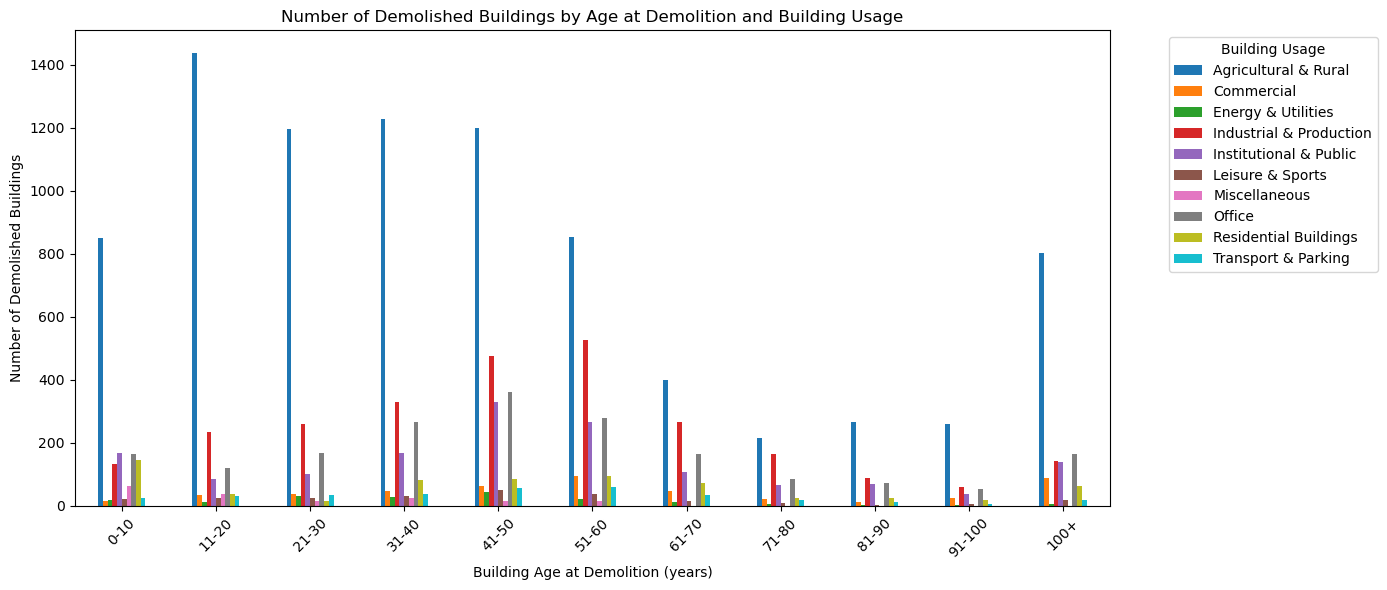

In [3]:
# bar chart showing number of demolished buldings by the age at demolition, the bars should be colored by the different bulding usage 

# Create age bins for better visualization
df['Age Group'] = pd.cut(df['Building Age at Demolition'], 
                          bins=[0, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 200],
                          labels=['0-10', '11-20', '21-30', '31-40', '41-50', '51-60', '61-70', '71-80', '81-90', '91-100', '100+'])

# Group by age group and building usage
age_usage_counts = df.groupby(['Age Group', 'Building Usage Broad'], observed=True).size().unstack(fill_value=0)

# Create the stacked bar chart
ax = age_usage_counts.plot(kind='bar', stacked=False, figsize=(14, 6), colormap='tab10')
ax.set_xlabel('Building Age at Demolition (years)')
ax.set_ylabel('Number of Demolished Buildings')
ax.set_title('Number of Demolished Buildings by Age at Demolition and Building Usage')
ax.legend(title='Building Usage', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()



## Building Typology by year of demolition

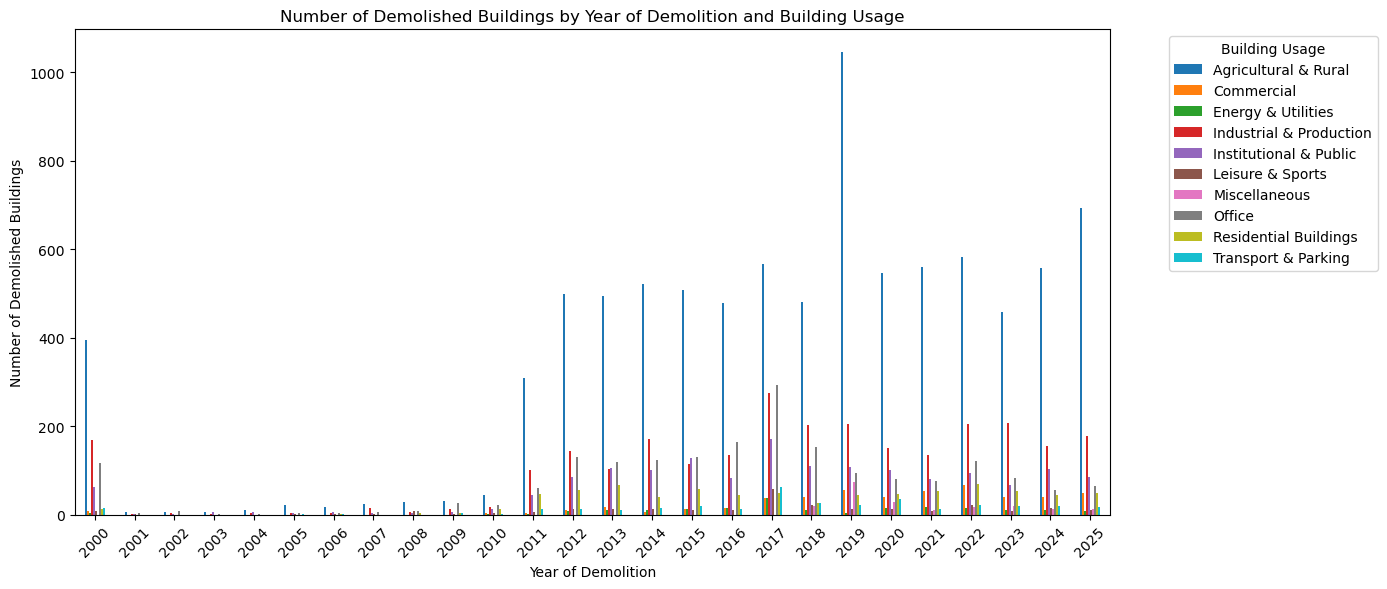

In [4]:
# Group by demolition year and building usage
year_usage_counts = df.groupby(['Demolition Year', 'Building Usage Broad'], observed=True).size().unstack(fill_value=0)

# Create the bar chart
ax = year_usage_counts.plot(kind='bar', stacked=False, figsize=(14, 6), colormap='tab10')
ax.set_xlabel('Year of Demolition')
ax.set_ylabel('Number of Demolished Buildings')
ax.set_title('Number of Demolished Buildings by Year of Demolition and Building Usage')
ax.legend(title='Building Usage', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()



In [20]:
df_all = pd.read_csv("data/bbr_nedrivning_bygning_all_mapped.csv", low_memory=False)

## 

In [21]:
df_merged = pd.merge(df, df_all, on='Plot', how='left', suffixes=('', '_replaced'))
df_merged = df_merged[df_merged['Year of Construction_replaced'] > df_merged['Year of Construction']]

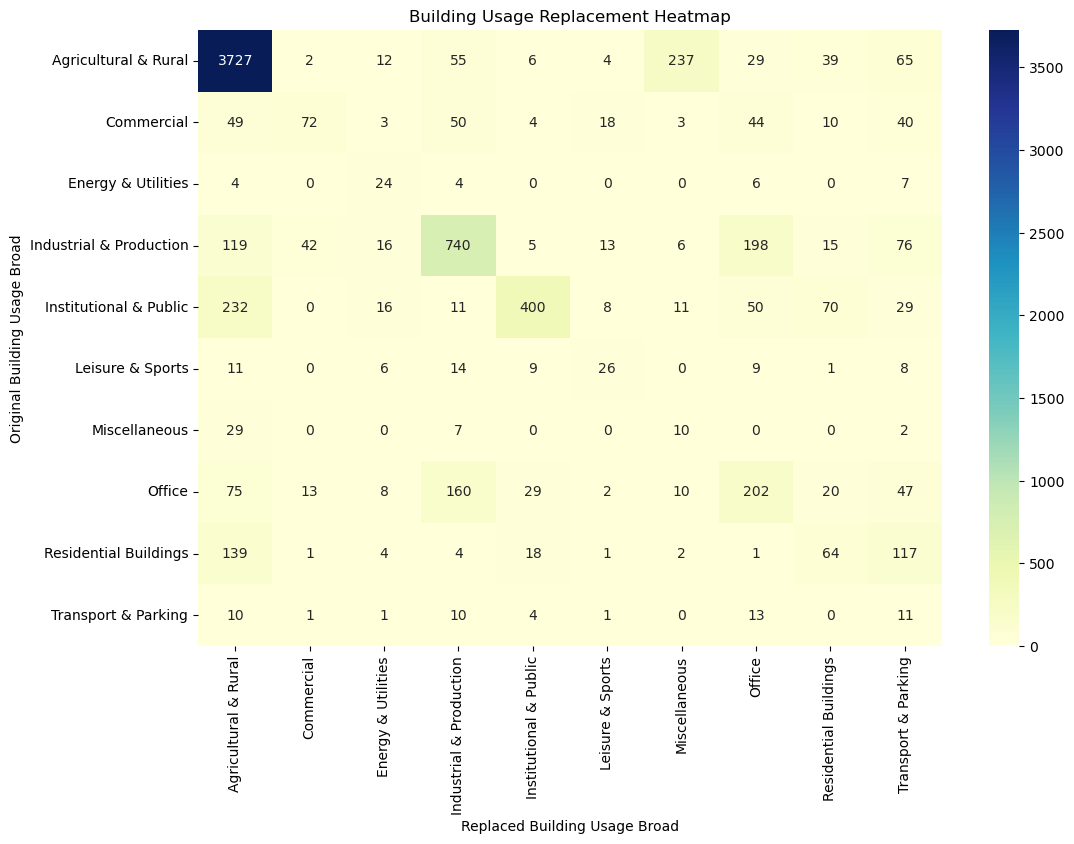

In [ ]:
# we want to see how the building usage is being replaced
usage_replacement = df_merged.groupby(['Building Usage Broad', 'Building Usage Broad_replaced'], observed=True).size().unstack(fill_value=0)
# Create the heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(usage_replacement, annot=True, fmt="d", cmap="YlGnBu")
plt.title("Building Usage Replacement Heatmap")
plt.xlabel("Replaced Building Usage Broad")
plt.ylabel("Original Building Usage Broad")
plt.show()

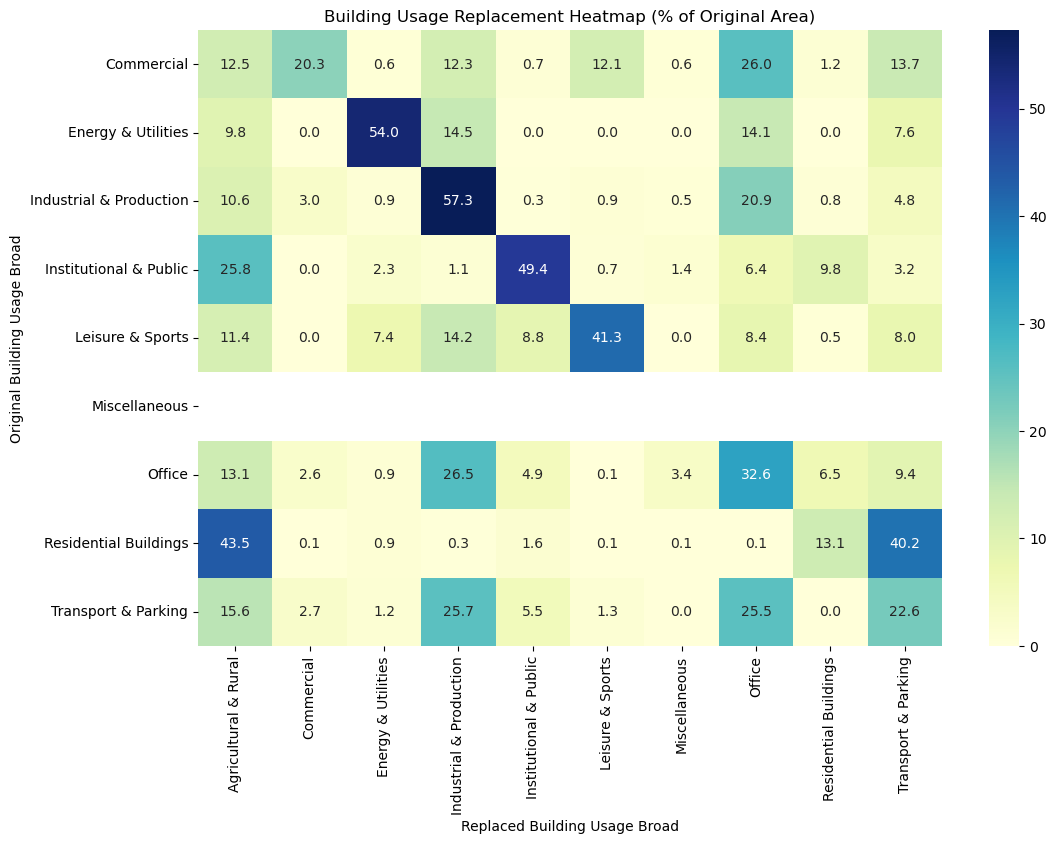

In [ ]:
# Calculate row percentages (each row sums to 100%)
df_office = df_merged[(df_merged['Building Usage Broad']!='Agricultural & Rural')]

usage_replacement_pct = df_office.groupby(['Building Usage Broad', 'Building Usage Broad_replaced'], observed=True)['Total Building Area'].sum().unstack(fill_value=0)
usage_replacement_pct = usage_replacement_pct.div(usage_replacement_pct.sum(axis=1), axis=0) * 100

# Create the heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(usage_replacement_pct, annot=True, fmt=".1f", cmap="YlGnBu")
plt.title("Building Usage Replacement Heatmap (% of Original Area)")
plt.xlabel("Replaced Building Usage Broad")
plt.ylabel("Original Building Usage Broad")
plt.show()

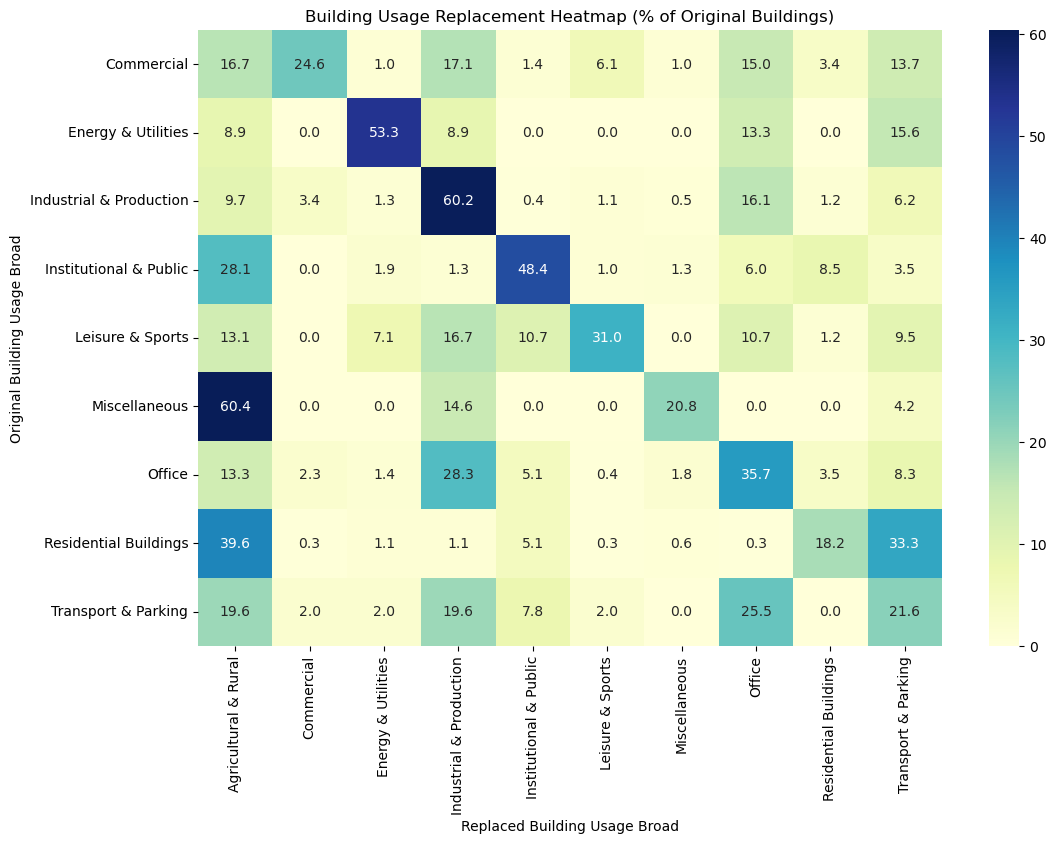

In [50]:
# Calculate row percentages (each row sums to 100%)
df_office = df_merged[(df_merged['Building Usage Broad']!='Agricultural & Rural')]

usage_replacement_pct = df_office.groupby(['Building Usage Broad', 'Building Usage Broad_replaced'], observed=True).size().unstack(fill_value=0)
usage_replacement_pct = usage_replacement_pct.div(usage_replacement_pct.sum(axis=1), axis=0) * 100

# Create the heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(usage_replacement_pct, annot=True, fmt=".1f", cmap="YlGnBu")
plt.title("Building Usage Replacement Heatmap (% of Original Buildings)")
plt.xlabel("Replaced Building Usage Broad")
plt.ylabel("Original Building Usage Broad")
plt.show()